model = "dmis-lab/biobert-v1.1" dataset = "disi-unibo-nlp/AnatEM"


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

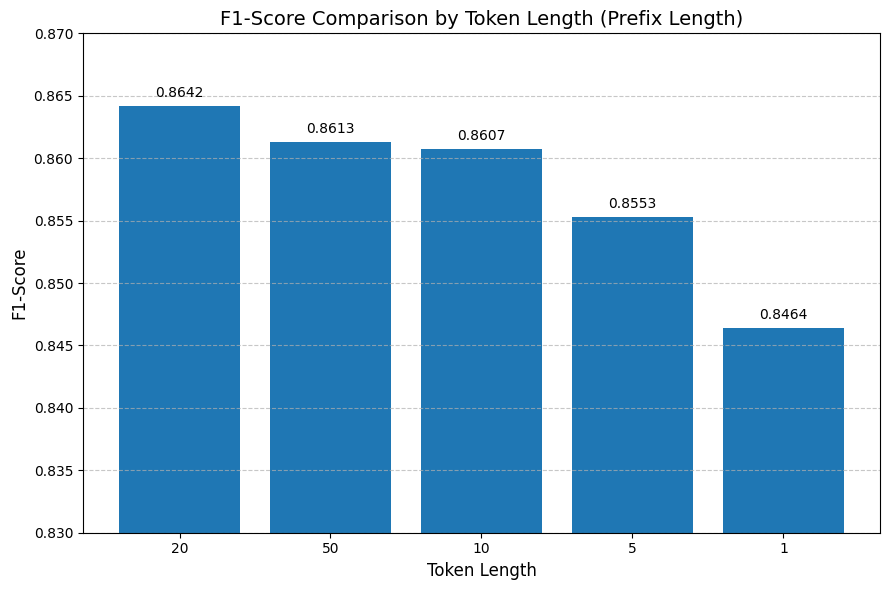

In [4]:

data = {
    'Token_Length': [1, 5, 10, 20, 50],
    'F1_Score': [0.8464, 0.8553, 0.8607, 0.8642, 0.8613]
}
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='F1_Score', ascending=False)
df_sorted['Token_Length'] = df_sorted['Token_Length'].astype(str)

plt.figure(figsize=(9, 6))
bars = plt.bar(df_sorted['Token_Length'], df_sorted['F1_Score'])

# labels
plt.title('F1-Score Comparison by Token Length (Prefix Length)', fontsize=14)
plt.xlabel('Token Length', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)

plt.ylim(0.83, 0.87)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [6]:
try:
    df_testing = pd.read_csv('testing_results.csv', sep=';')
    print("Dati di testing caricati con successo!")
except FileNotFoundError:
    print("Errore.")
    raise

Dati di testing caricati con successo!


In [7]:
print("\nPrime righe del DataFrame:")
print(df_testing.head())


Prime righe del DataFrame:
                   Model                Dataset  token_length  \
0  dmis-lab/biobert-v1.1  disi-unibo-nlp/AnatEM            10   
1  dmis-lab/biobert-v1.1  disi-unibo-nlp/AnatEM            20   
2  dmis-lab/biobert-v1.1  disi-unibo-nlp/AnatEM            50   
3  dmis-lab/biobert-v1.1  disi-unibo-nlp/JNLPBA            10   
4  dmis-lab/biobert-v1.1  disi-unibo-nlp/JNLPBA            20   

   Micro Avg F1-Score  
0              0.8662  
1              0.8541  
2              0.8472  
3              0.7236  
4              0.7293  


C:\Users\Franco\AppData\Local\Temp\ipykernel_25312\3308830184.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


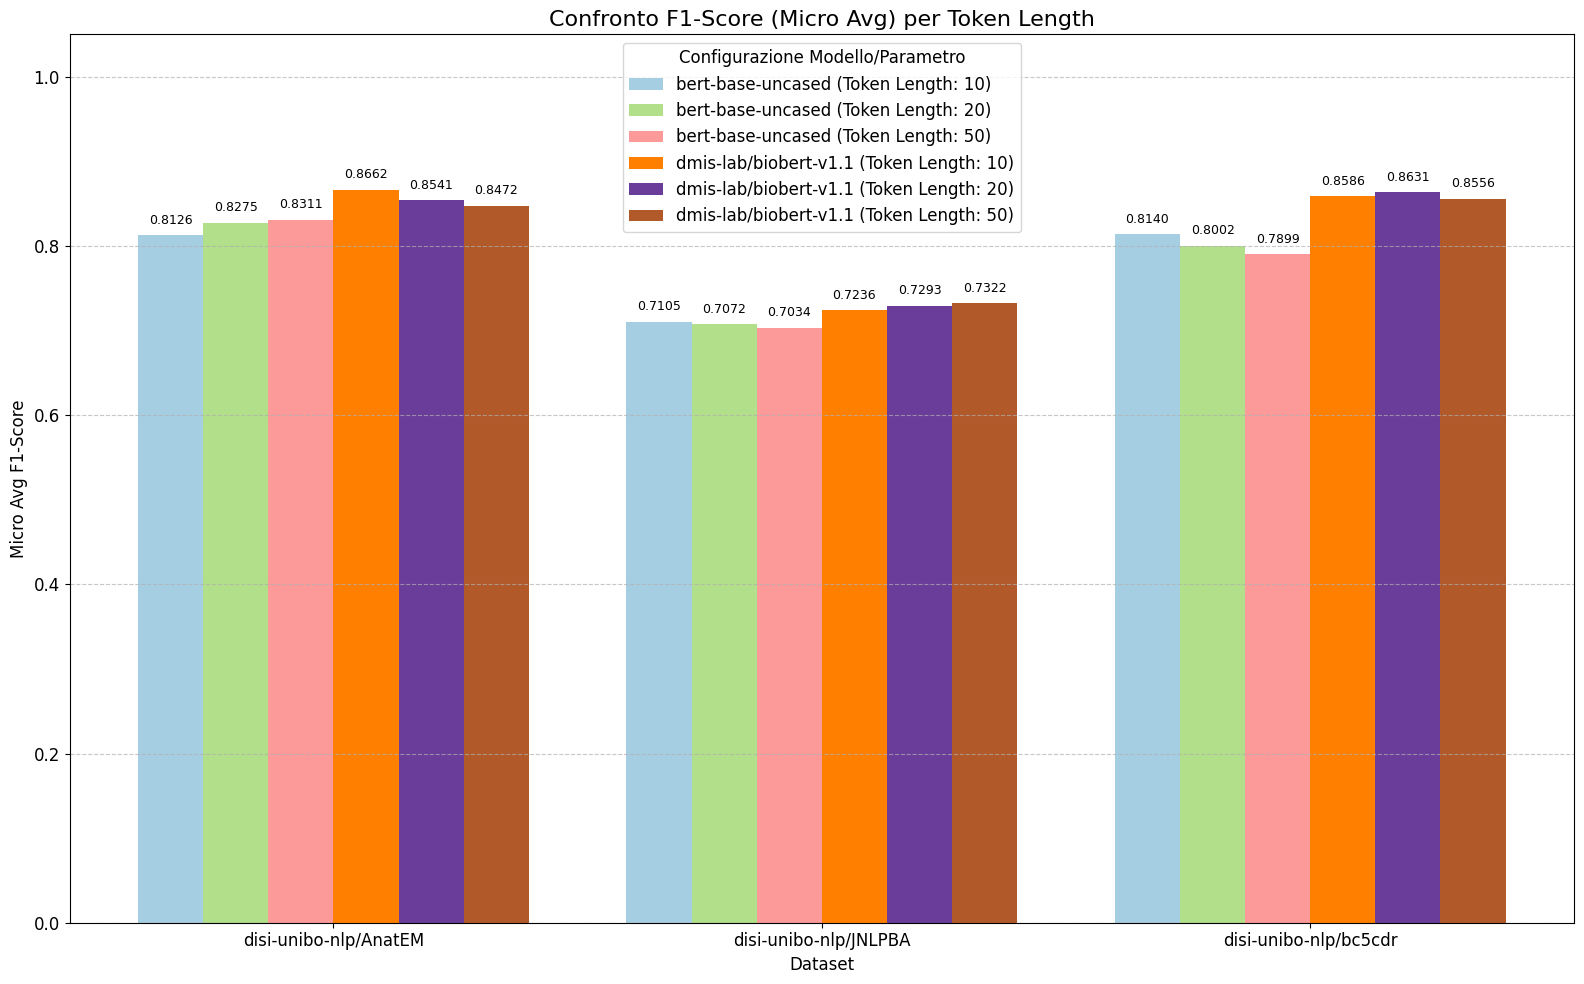

In [11]:
PARAM_COL_NAME = "token_length"

df_plotting = df_testing.copy()

# Rinomina la colonna del parametro per facilità nel plotting, 
df_plotting = df_plotting.rename(columns={PARAM_COL_NAME: 'Trained_Param_Value'})

# Sort
df_plotting = df_plotting.sort_values(by=['Dataset', 'Model', 'Trained_Param_Value'])

plt.figure(figsize=(16, 10))

# Dati
datasets = df_plotting['Dataset'].unique()
configurations = df_plotting[['Model', 'Trained_Param_Value']].drop_duplicates().reset_index(drop=True)
num_configs = len(configurations)
bar_width = 0.8 / num_configs
x_pos = np.arange(len(datasets))

colors = plt.cm.get_cmap('Paired', num_configs)

# Barre
for i, (index, config) in enumerate(configurations.iterrows()):
    model = config['Model']
    param_val = config['Trained_Param_Value']

    subset = df_plotting[(df_plotting['Model'] == model) & (df_plotting['Trained_Param_Value'] == param_val)]
    
    heights = [subset[subset['Dataset'] == ds]['Micro Avg F1-Score'].iloc[0] for ds in datasets]

    position = x_pos + (i - (num_configs - 1) / 2) * bar_width

    legend_label = f'{model} ({PARAM_COL_NAME.replace("_", " ").title()}: {param_val})'

    plt.bar(position, heights, bar_width, 
            label=legend_label, 
            color=colors(i))
    
    # Etichette sopra le barre
    for pos, height in zip(position, heights):
        plt.text(pos, height + 0.01, f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Info grafico
plt.title(f'Confronto F1-Score (Micro Avg) per {PARAM_COL_NAME.replace("_", " ").title()}', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Micro Avg F1-Score', fontsize=12)
plt.xticks(x_pos, datasets)
plt.ylim(0, 1.05)
plt.legend(title='Configurazione Modello/Parametro')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()